In [ ]:
# todo: up here you could add:

# Aim of Notebook:
# Datasets used: Spead.csv for application records, RFM Kenzup: the data for extracting Customer Lifetime cycle 
# References:
# Article: https://towardsdatascience.com/buy-til-you-die-predict-customer-lifetime-value-in-python-9701bfd4ddc0
# Key Libraries: 
# pytz: for time zone 
# lifetimes: for the Models which used to perform Customer Lifetime value 
# Date:25/03/2022
# Author: Bahaa Youssef

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-Customer-Lifetime-Value?" data-toc-modified-id="What-is-Customer-Lifetime-Value?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is Customer Lifetime Value?<br></a></span></li><li><span><a href="#loading-CSV-files" data-toc-modified-id="loading-CSV-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>loading CSV files</a></span></li><li><span><a href="#Creating-Dataset-from-Two-Datasets" data-toc-modified-id="Creating-Dataset-from-Two-Datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating Dataset from Two Datasets</a></span></li><li><span><a href="#Extracting-Monetary" data-toc-modified-id="Extracting-Monetary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extracting Monetary</a></span></li><li><span><a href="#Extracting-Difference-Between-first-transaction-and-leatest-one." data-toc-modified-id="Extracting-Difference-Between-first-transaction-and-leatest-one.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extracting Difference Between first transaction and leatest one.</a></span></li><li><span><a href="#Extracting-Recency" data-toc-modified-id="Extracting-Recency-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extracting Recency</a></span></li><li><span><a href="#Extracting-Frequency" data-toc-modified-id="Extracting-Frequency-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Extracting Frequency</a></span></li><li><span><a href="#Sum-Monetary" data-toc-modified-id="Sum-Monetary-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sum Monetary</a></span></li><li><span><a href="#Create-RFM-dataset" data-toc-modified-id="Create-RFM-dataset-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create RFM dataset</a></span></li><li><span><a href="#Extracting-Time-spended-from-signup-to-last-transaction" data-toc-modified-id="Extracting-Time-spended-from-signup-to-last-transaction-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Extracting Time spended from signup to last transaction</a></span></li><li><span><a href="#Extracting-Cycle-Lifetime-Value" data-toc-modified-id="Extracting-Cycle-Lifetime-Value-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Extracting Cycle Lifetime Value</a></span></li><li><span><a href="#Explaining-the-Results:" data-toc-modified-id="Explaining-the-Results:-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Explaining the Results:</a></span></li><li><span><a href="#What-Next" data-toc-modified-id="What-Next-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>What Next</a></span></li></ul></div>

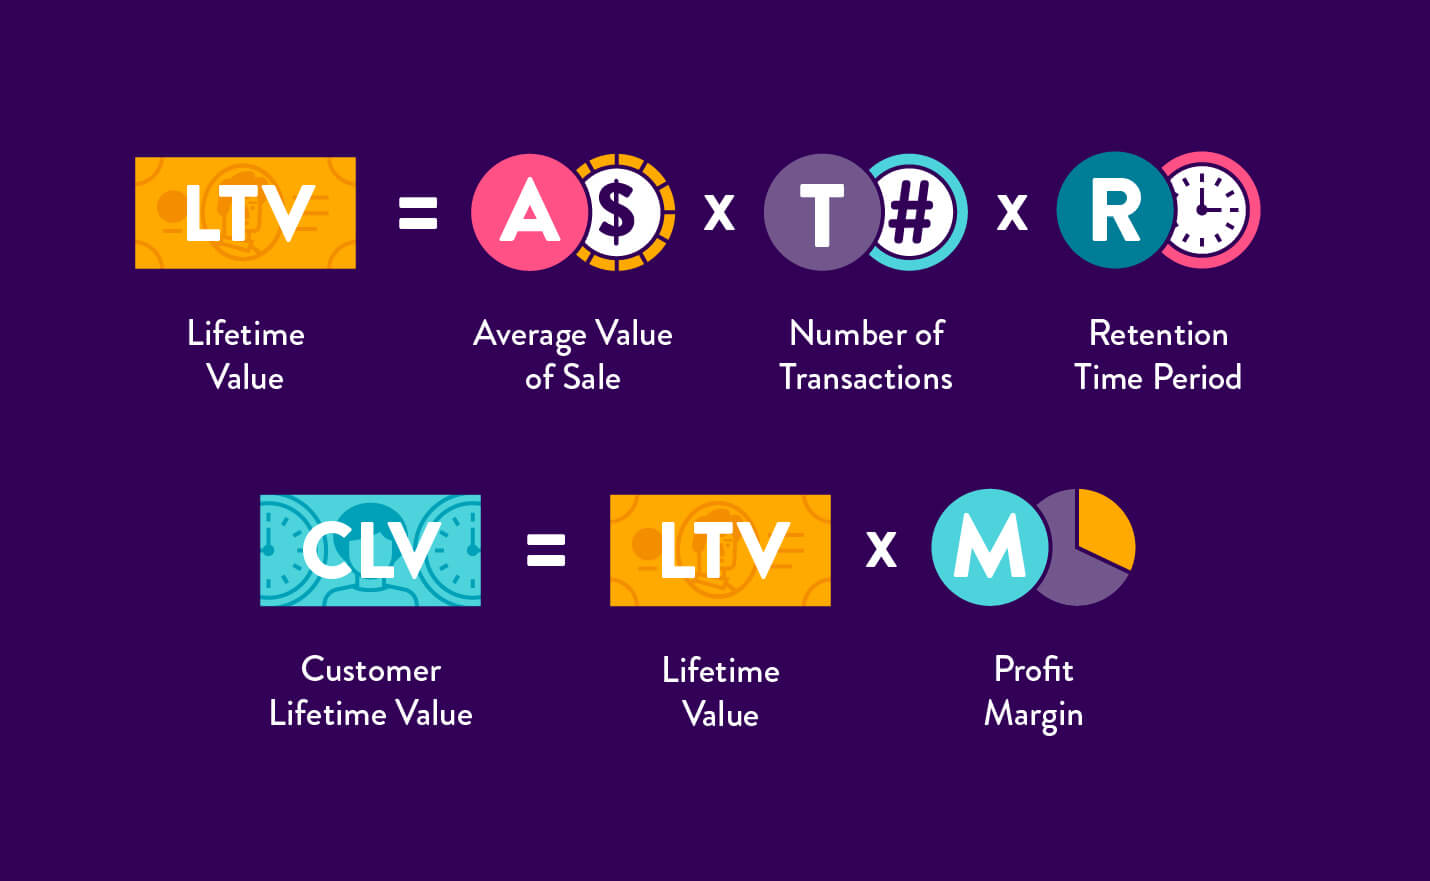

In [1]:
from IPython.display import Image, display 
display(Image(filename='calculation-for-customer-lifetime-value.jpg'))

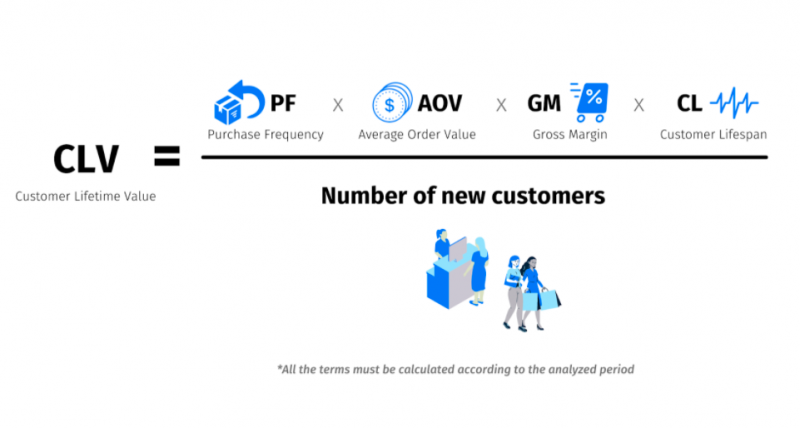

In [2]:
from IPython.display import Image, display 
display(Image(filename='image2-3-800x428.png'))

In [ ]:
# todo: can you include an overall formula or how the model calculates it per customer.
# todo: can you just explain the different variables below - if you know, if not just keep blank.
# todo: generally, try to comment your notebooks a bit more so it is easier for us to share ideas and work.
# todo: next time you include discounts etc and maybe even try other modeling strategies - maybe make a notebook
# AND additionally put together a few slides, so the nontechnical audience such as research etc can follow along
# a bit easier :)

# OVERALL: Great work, Bahaa ! Thank you for going through it so thoroughly :) Just go through the notebook and
# find the little "todo" comments. 

# What is Customer Lifetime Value?<br>

> It is the calculation of the value that the customer provides to the customer by remaining in using the service or purchasing a product. <br>

**CLV or Customer Lifetime Value is related to four parameters:** <br>

    1) How often does the customer buy the product or use the service? (Frequency)
    2) What is the time between the first purchase or use and the last one? (Recency)
    3) The rate of profit or savings that the customer achieves when he uses the service or buys the product through the discounts. (Monetary)
    4) The time a user or buyer spends with (Time)

**In the following initial stages we will extract these prameters to calculate the CLV per customer (?).** 


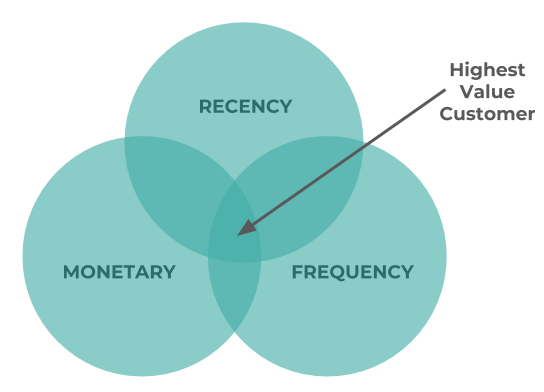

In [57]:
from IPython.display import Image, display 
display(Image(filename='RFM.png'))

# loading CSV files

**Variables of rfmData (rfm-data-kenzup.csv):**
> `transtime` = The date of the transaction
>
> `amount` = The Amount of the transaction 
>
> `pointamount` = The Transaction 
> 
> `name` = Brand name
>
> `shop_id` = Id of shop where purchase took place ?
>
> `type` = What type of purchase ?
> 
> `signup` = 

**Variables of spreadData (spread.csv):**
> ...
>
> ...
>
> ...
>
> ...

In [3]:
import pandas as pd

rfmData = pd.read_csv('rfm-data-kenzup.csv')

In [4]:
rfmData.head(3)

,Unnamed: 0,customer,signup,id,transtime,amount,pointamount,name,shop_id,type
0,0,253f6e8e-8eb3-4e58-aa28-07edc325cbae,2021-06-29 08:37:05.933057+00:00,8338489,2021-12-27 18:34:41.591682+00:00,584.4,584.4,Afriquia Gaz,1339,out_of_app
1,1,6c8069e7-16e3-4b66-8c90-63a6547e1bb1,2021-06-26 09:07:06.969681+00:00,8341393,2021-12-27 19:08:48.308152+00:00,156.0,156.0,Afriquia Gaz,1182,out_of_app
2,2,bd94c41e-5bbf-4dac-b803-676d9a70400a,2021-07-29 12:56:10.839954+00:00,8354846,2021-12-27 23:17:32.551698+00:00,39.0,39.0,Afriquia Gaz,1191,out_of_app


In [5]:
spreadData=pd.read_csv('spread.csv')

In [6]:
spreadData.head(3)

,__sdc_row,__sdc_sheet_id,__sdc_spreadsheet_id,_sdc_batched_at,_sdc_extracted_at,_sdc_received_at,_sdc_sequence,_sdc_table_version,brand,group,id,spread
0,5,813553056,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687180003,1647010703886,Oasis Café,AKWA,4.0,0.10
1,15,813553056,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687325013,1647010703886,Armani Exchange,AKSAL,15.0,0.15
2,22,813553056,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.332,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687420020,1647010703886,Zara Home,AKSAL,22.0,0.15


# Creating Dataset from Two Datasets 

In [7]:
rfmData = rfmData.loc[rfmData['name']!='Afriquia Gaz']
rfmData = rfmData.loc[rfmData['type']!= 'dummy']

rfmData.head(3)

,Unnamed: 0,customer,signup,id,transtime,amount,pointamount,name,shop_id,type
3,3,99b441de-12c3-4211-9714-95c1c5afba70,2020-10-06 11:46:18.453562+00:00,9022630,2022-01-14 12:18:00.815522+00:00,200.0,200.0,Afriquia,252,out_of_app
8,8,2a67083a-bb2f-48ee-bd66-cfb3499b6219,2021-01-14 13:22:29.606743+00:00,8380328,2021-12-28 13:20:20.714395+00:00,800.0,800.0,Afriquia,396,out_of_app
9,9,ae9d813b-f791-43e9-9373-f8c5f602afb5,2021-06-26 10:48:58.536398+00:00,9032132,2022-01-14 15:44:10.885122+00:00,50.0,50.0,Afriquia,130,out_of_app


In [8]:
spreadData.brand

0                                  Oasis Café
1                             Armani Exchange
2                                   Zara Home
3                                     Lefties
4                                        Zara
5                                Afriquia Gaz
6                           Badr Gaz (Tissir)
7                                 EspressoLab
8                                       Quick
9     Les trois fées Pâtisserie - Boulangerie
10                                  Skinmania
11                                    Carpisa
12                                    Tendy's
13                                Miss Moscow
14              Société Nouvelles des Moulins
15                                    Yan&One
16                                      Gucci
17                               Just Cavalli
18                              Massimo Dutti
19                                       Hany
20                               Koolsmoothie
21                              Ma

In [9]:
spreadData = spreadData.rename({'brand':'name'},axis=1)
data = pd.merge(rfmData,spreadData, how='inner', on=['name'])
data.head(3)

,Unnamed: 0,customer,signup,id_x,transtime,amount,pointamount,name,shop_id,type,...,__sdc_sheet_id,__sdc_spreadsheet_id,_sdc_batched_at,_sdc_extracted_at,_sdc_received_at,_sdc_sequence,_sdc_table_version,group,id_y,spread
0,3,99b441de-12c3-4211-9714-95c1c5afba70,2020-10-06 11:46:18.453562+00:00,9022630,2022-01-14 12:18:00.815522+00:00,200.0,200.0,Afriquia,252,out_of_app,...,813553056,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1
1,8,2a67083a-bb2f-48ee-bd66-cfb3499b6219,2021-01-14 13:22:29.606743+00:00,8380328,2021-12-28 13:20:20.714395+00:00,800.0,800.0,Afriquia,396,out_of_app,...,813553056,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1
2,9,ae9d813b-f791-43e9-9373-f8c5f602afb5,2021-06-26 10:48:58.536398+00:00,9032132,2022-01-14 15:44:10.885122+00:00,50.0,50.0,Afriquia,130,out_of_app,...,813553056,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1


In [10]:
data.dtypes

Unnamed: 0                int64
customer                 object
signup                   object
id_x                      int64
transtime                object
amount                  float64
pointamount             float64
name                     object
shop_id                   int64
type                     object
__sdc_row                 int64
__sdc_sheet_id            int64
__sdc_spreadsheet_id     object
_sdc_batched_at          object
_sdc_extracted_at        object
_sdc_received_at         object
_sdc_sequence             int64
_sdc_table_version        int64
group                    object
id_y                    float64
spread                  float64
dtype: object

In [11]:
dateList = ['signup','transtime','_sdc_batched_at','_sdc_extracted_at','_sdc_received_at']
data[dateList]=data[dateList].apply(pd.to_datetime,errors='coerce')
data.dtypes

Unnamed: 0                            int64
customer                             object
signup                  datetime64[ns, UTC]
id_x                                  int64
transtime               datetime64[ns, UTC]
amount                              float64
pointamount                         float64
name                                 object
shop_id                               int64
type                                 object
__sdc_row                             int64
__sdc_sheet_id                        int64
__sdc_spreadsheet_id                 object
_sdc_batched_at              datetime64[ns]
_sdc_extracted_at            datetime64[ns]
_sdc_received_at             datetime64[ns]
_sdc_sequence                         int64
_sdc_table_version                    int64
group                                object
id_y                                float64
spread                              float64
dtype: object

# Extracting Monetary

In [12]:
data['monetary'] = data['pointamount']+data['spread'] # todo: why is this being added ?
data.head(3)

,Unnamed: 0,customer,signup,id_x,transtime,amount,pointamount,name,shop_id,type,...,__sdc_spreadsheet_id,_sdc_batched_at,_sdc_extracted_at,_sdc_received_at,_sdc_sequence,_sdc_table_version,group,id_y,spread,monetary
0,3,99b441de-12c3-4211-9714-95c1c5afba70,2020-10-06 11:46:18.453562+00:00,9022630,2022-01-14 12:18:00.815522+00:00,200.0,200.0,Afriquia,252,out_of_app,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,200.1
1,8,2a67083a-bb2f-48ee-bd66-cfb3499b6219,2021-01-14 13:22:29.606743+00:00,8380328,2021-12-28 13:20:20.714395+00:00,800.0,800.0,Afriquia,396,out_of_app,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,800.1
2,9,ae9d813b-f791-43e9-9373-f8c5f602afb5,2021-06-26 10:48:58.536398+00:00,9032132,2022-01-14 15:44:10.885122+00:00,50.0,50.0,Afriquia,130,out_of_app,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,50.1


In [13]:
len(data)

3108929

# Extracting Difference Between first transaction and leatest one. 

In [14]:
customerData = data.groupby(['customer'])
len(customerData)

354797

In [15]:
import numpy as np
diffData=customerData.agg(Minimum_Date=('transtime', np.min), Maximum_Date=('transtime', np.max))
len(diffData)

354797

In [16]:
diffData.reset_index()

,customer,Minimum_Date,Maximum_Date
0,00001d7f-9204-4357-878a-313602a617d1,2021-12-22 11:43:03.020598+00:00,2022-01-24 14:30:36.705329+00:00
1,000073b2-185b-4666-b3c1-5ccfcc746993,2021-11-18 14:44:38.833490+00:00,2021-11-18 14:44:38.833490+00:00
2,0000a01d-9de5-4838-b707-80b409b5769d,2021-09-18 17:21:21.015176+00:00,2021-09-18 17:21:21.015176+00:00
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,2021-11-17 14:51:48.850648+00:00,2021-11-17 14:51:48.850648+00:00
4,0000aa7d-471d-4c95-b413-0d12b311e608,2021-08-21 11:44:37.596533+00:00,2022-02-10 17:26:02.787287+00:00
...,...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,2021-12-16 19:10:33.316192+00:00,2022-02-01 11:01:49.887829+00:00
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,2021-08-27 08:40:04.233137+00:00,2021-12-14 10:39:19.808328+00:00
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,2021-10-08 17:36:10.372995+00:00,2021-12-11 14:01:56.155454+00:00
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,2021-11-17 14:51:48.850648+00:00,2021-12-30 12:37:04.102529+00:00


In [17]:
diffData.dtypes

Minimum_Date    datetime64[ns, UTC]
Maximum_Date    datetime64[ns, UTC]
dtype: object

In [18]:
import pytz 
import datetime 

date = datetime.datetime(2022,1,9)
timezone = pytz.timezone("Africa/Casablanca")
d_aware = timezone.localize(date)
d_aware # todo: What is this ? - is this the final date of the data collection?

datetime.datetime(2022, 1, 9, 0, 0, tzinfo=<DstTzInfo 'Africa/Casablanca' +01+1:00:00 STD>)

In [19]:
# todo: Why is d_aware used instead of Maximum_Date ?
diffData['Minimum_Date']=diffData['Minimum_Date'].dt.tz_convert("Africa/Casablanca")
diffData['diff']=(d_aware-diffData['Minimum_Date']).dt.days 
diffData.head(5)

,Minimum_Date,Maximum_Date,diff
customer,,,
00001d7f-9204-4357-878a-313602a617d1,2021-12-22 12:43:03.020598+01:00,2022-01-24 14:30:36.705329+00:00,17
000073b2-185b-4666-b3c1-5ccfcc746993,2021-11-18 15:44:38.833490+01:00,2021-11-18 14:44:38.833490+00:00,51
0000a01d-9de5-4838-b707-80b409b5769d,2021-09-18 18:21:21.015176+01:00,2021-09-18 17:21:21.015176+00:00,112
0000a2aa-c62d-4084-91fd-0eefb711fdb2,2021-11-17 15:51:48.850648+01:00,2021-11-17 14:51:48.850648+00:00,52
0000aa7d-471d-4c95-b413-0d12b311e608,2021-08-21 12:44:37.596533+01:00,2022-02-10 17:26:02.787287+00:00,140


In [20]:
data = pd.merge(diffData,data,how='inner',on=['customer'])
data.head(5)

,customer,Minimum_Date,Maximum_Date,diff,Unnamed: 0,signup,id_x,transtime,amount,pointamount,...,__sdc_spreadsheet_id,_sdc_batched_at,_sdc_extracted_at,_sdc_received_at,_sdc_sequence,_sdc_table_version,group,id_y,spread,monetary
0,00001d7f-9204-4357-878a-313602a617d1,2021-12-22 12:43:03.020598+01:00,2022-01-24 14:30:36.705329+00:00,17,3872826,2020-10-16 13:43:32.910429+00:00,9394459,2022-01-24 14:30:36.705329+00:00,830.08,830.08,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,830.18
1,00001d7f-9204-4357-878a-313602a617d1,2021-12-22 12:43:03.020598+01:00,2022-01-24 14:30:36.705329+00:00,17,3888795,2020-10-16 13:43:32.910429+00:00,8578989,2022-01-02 17:02:52.080202+00:00,1484.00,1484.00,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,1484.10
2,00001d7f-9204-4357-878a-313602a617d1,2021-12-22 12:43:03.020598+01:00,2022-01-24 14:30:36.705329+00:00,17,3960132,2020-10-16 13:43:32.910429+00:00,8153335,2021-12-22 11:43:03.020598+00:00,785.01,785.01,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,785.11
3,000073b2-185b-4666-b3c1-5ccfcc746993,2021-11-18 15:44:38.833490+01:00,2021-11-18 14:44:38.833490+00:00,51,4517824,2021-11-18 14:42:06.210366+00:00,6886022,2021-11-18 14:44:38.833490+00:00,466.10,466.10,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,466.20
4,0000a01d-9de5-4838-b707-80b409b5769d,2021-09-18 18:21:21.015176+01:00,2021-09-18 17:21:21.015176+00:00,112,3333238,2021-09-15 10:12:36.291972+00:00,5143601,2021-09-18 17:21:21.015176+00:00,50.00,50.00,...,1icKr0V1eJDT6maSZ4IY27iorq8cu0QgmV4-VcDqby7Q,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,50.10


In [21]:
data.dtypes

customer                                           object
Minimum_Date            datetime64[ns, Africa/Casablanca]
Maximum_Date                          datetime64[ns, UTC]
diff                                                int64
Unnamed: 0                                          int64
signup                                datetime64[ns, UTC]
id_x                                                int64
transtime                             datetime64[ns, UTC]
amount                                            float64
pointamount                                       float64
name                                               object
shop_id                                             int64
type                                               object
__sdc_row                                           int64
__sdc_sheet_id                                      int64
__sdc_spreadsheet_id                               object
_sdc_batched_at                            datetime64[ns]
_sdc_extracted

In [22]:
customerData = data.groupby('customer')

# Extracting Recency

In [23]:
# todo: explain what the snapshot is and how recency is calculated

In [58]:
snapshot = data['transtime'].max()
snapshot = snapshot + pd.Timedelta(1,'d')
print(snapshot)

2022-02-17 12:29:09.454221+00:00
2022-02-18 12:29:09.454221+00:00


In [25]:
recency = (snapshot-pd.to_datetime(customerData['transtime'].max()))
recency

customer
00001d7f-9204-4357-878a-313602a617d1    24 days 21:58:32.748892
000073b2-185b-4666-b3c1-5ccfcc746993    91 days 21:44:30.620731
0000a01d-9de5-4838-b707-80b409b5769d   152 days 19:07:48.439045
0000a2aa-c62d-4084-91fd-0eefb711fdb2    92 days 21:37:20.603573
0000aa7d-471d-4c95-b413-0d12b311e608     7 days 19:03:06.666934
                                                 ...           
fffe6d26-dd25-49de-98a6-16333dde70d7    17 days 01:27:19.566392
fffed58f-e7e1-48cc-9b19-8ee6ec250bc2    66 days 01:49:49.645893
fffefb4e-7a6a-4c32-9b94-467caf0928b3    68 days 22:27:13.298767
ffff0f63-521e-4fa5-9dc8-905a16ba4006    49 days 23:52:05.351692
ffff588d-6855-4e8f-b883-49cbd84dd0cc     6 days 21:31:34.758550
Name: transtime, Length: 354797, dtype: timedelta64[ns]

# Extracting Frequency 

In [26]:
frequency_df = data.drop_duplicates().groupby(by=['customer'],as_index=False)['transtime'].count()
frequency_df

,customer,transtime
0,00001d7f-9204-4357-878a-313602a617d1,3
1,000073b2-185b-4666-b3c1-5ccfcc746993,1
2,0000a01d-9de5-4838-b707-80b409b5769d,1
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,1
4,0000aa7d-471d-4c95-b413-0d12b311e608,16
...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,7
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,9
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,6
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,2


In [27]:
# todo: comment here really quick what;s calculated --> maybe formula, reasoning why calculated like this
Freq = data.drop_duplicates().groupby(
    by=['customer'], as_index=False)['diff'].mean()
Freq=pd.merge(frequency_df,Freq, how='inner' , on=['customer'])
Freq['Frequency']=(Freq['transtime']/Freq['diff'])
Freq=Freq[['customer','Frequency']]
Freq

,customer,Frequency
0,00001d7f-9204-4357-878a-313602a617d1,0.176471
1,000073b2-185b-4666-b3c1-5ccfcc746993,0.019608
2,0000a01d-9de5-4838-b707-80b409b5769d,0.008929
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,0.019231
4,0000aa7d-471d-4c95-b413-0d12b311e608,0.114286
...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,0.304348
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,0.067164
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,0.065217
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,0.038462


# Sum Monetary 

In [28]:
# todo: again write a small intro how calculated and why

In [29]:
monetary_df = data.drop_duplicates().groupby(
    by=['customer'], as_index=False)['monetary'].sum()
monetary_df

,customer,monetary
0,00001d7f-9204-4357-878a-313602a617d1,3099.39
1,000073b2-185b-4666-b3c1-5ccfcc746993,466.20
2,0000a01d-9de5-4838-b707-80b409b5769d,50.10
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,583.10
4,0000aa7d-471d-4c95-b413-0d12b311e608,4157.30
...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,1038.74
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,2970.90
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,5981.90
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,1693.30


In [30]:
Mone = data.drop_duplicates().groupby(
    by=['customer'], as_index=False)['diff'].mean()
Mone

,customer,diff
0,00001d7f-9204-4357-878a-313602a617d1,17.0
1,000073b2-185b-4666-b3c1-5ccfcc746993,51.0
2,0000a01d-9de5-4838-b707-80b409b5769d,112.0
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,52.0
4,0000aa7d-471d-4c95-b413-0d12b311e608,140.0
...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,23.0
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,134.0
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,92.0
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,52.0


In [31]:
Monetary=pd.merge(monetary_df,Mone, how='inner' , on=['customer'])
Monetary['Monetary']=(Monetary['monetary']/Monetary['diff'])
Monetary=Monetary[['customer','Monetary']]
Monetary

,customer,Monetary
0,00001d7f-9204-4357-878a-313602a617d1,182.317059
1,000073b2-185b-4666-b3c1-5ccfcc746993,9.141176
2,0000a01d-9de5-4838-b707-80b409b5769d,0.447321
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,11.213462
4,0000aa7d-471d-4c95-b413-0d12b311e608,29.695000
...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,45.162609
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,22.170896
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,65.020652
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,32.563462


# Create RFM dataset

In [32]:
rfm =  pd.DataFrame()
rfm["Recency"] = recency.dt.days 
rfm=rfm.reset_index()
rfm=pd.merge(rfm,Monetary, how='inner' , on=['customer'])
rfm=pd.merge(Freq,rfm, how='inner' , on=['customer'])
rfm

,customer,Frequency,Recency,Monetary
0,00001d7f-9204-4357-878a-313602a617d1,0.176471,24,182.317059
1,000073b2-185b-4666-b3c1-5ccfcc746993,0.019608,91,9.141176
2,0000a01d-9de5-4838-b707-80b409b5769d,0.008929,152,0.447321
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,0.019231,92,11.213462
4,0000aa7d-471d-4c95-b413-0d12b311e608,0.114286,7,29.695000
...,...,...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,0.304348,17,45.162609
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,0.067164,66,22.170896
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,0.065217,68,65.020652
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,0.038462,49,32.563462


In [33]:
rfm=rfm[~rfm.isin([np.nan, np.inf, -np.inf]).any(1)]
rfm=rfm.loc[rfm['Frequency']>0]
len(rfm)

313289

In [34]:
# todo: this was given by kenzup right?
rfm['normalized_Recency']=(1/(rfm['Recency']*0.3+1)*-1+1)
rfm['normalized_Frequency']=(1/(rfm['Frequency']*5+1)*-1+1)
rfm['normalized_Monetary']=(1/(rfm['Monetary']*0.04+1)*-1+1)
rfm

,customer,Frequency,Recency,Monetary,normalized_Recency,normalized_Frequency,normalized_Monetary
0,00001d7f-9204-4357-878a-313602a617d1,0.176471,24,182.317059,0.878049,0.468750,0.879412
1,000073b2-185b-4666-b3c1-5ccfcc746993,0.019608,91,9.141176,0.964664,0.089286,0.267746
2,0000a01d-9de5-4838-b707-80b409b5769d,0.008929,152,0.447321,0.978541,0.042735,0.017578
3,0000a2aa-c62d-4084-91fd-0eefb711fdb2,0.019231,92,11.213462,0.965035,0.087719,0.309649
4,0000aa7d-471d-4c95-b413-0d12b311e608,0.114286,7,29.695000,0.677419,0.363636,0.542920
...,...,...,...,...,...,...,...
354792,fffe6d26-dd25-49de-98a6-16333dde70d7,0.304348,17,45.162609,0.836066,0.603448,0.643685
354793,fffed58f-e7e1-48cc-9b19-8ee6ec250bc2,0.067164,66,22.170896,0.951923,0.251397,0.470012
354794,fffefb4e-7a6a-4c32-9b94-467caf0928b3,0.065217,68,65.020652,0.953271,0.245902,0.722286
354795,ffff0f63-521e-4fa5-9dc8-905a16ba4006,0.038462,49,32.563462,0.936306,0.161290,0.565697


# Extracting Time spended from signup to last transaction 

In [35]:
data['Maximum_Date']=data['Maximum_Date'].dt.tz_convert("Africa/Casablanca")
data['signup']=data['signup'].dt.tz_convert("Africa/Casablanca")
data['time']=(data['Maximum_Date']-data['signup']).dt.days
rfm=pd.merge(rfm,data,how='outer',on=['customer'])
len(data)

3108929

In [36]:
data.head(3)

,customer,Minimum_Date,Maximum_Date,diff,Unnamed: 0,signup,id_x,transtime,amount,pointamount,...,_sdc_batched_at,_sdc_extracted_at,_sdc_received_at,_sdc_sequence,_sdc_table_version,group,id_y,spread,monetary,time
0,00001d7f-9204-4357-878a-313602a617d1,2021-12-22 12:43:03.020598+01:00,2022-01-24 15:30:36.705329+01:00,17,3872826,2020-10-16 14:43:32.910429+01:00,9394459,2022-01-24 14:30:36.705329+00:00,830.08,830.08,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,830.18,465
1,00001d7f-9204-4357-878a-313602a617d1,2021-12-22 12:43:03.020598+01:00,2022-01-24 15:30:36.705329+01:00,17,3888795,2020-10-16 14:43:32.910429+01:00,8578989,2022-01-02 17:02:52.080202+00:00,1484.00,1484.00,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,1484.10,465
2,00001d7f-9204-4357-878a-313602a617d1,2021-12-22 12:43:03.020598+01:00,2022-01-24 15:30:36.705329+01:00,17,3960132,2020-10-16 14:43:32.910429+01:00,8153335,2021-12-22 11:43:03.020598+00:00,785.01,785.01,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,785.11,465


In [37]:
rfm.head()

,customer,Frequency,Recency,Monetary,normalized_Recency,normalized_Frequency,normalized_Monetary,Minimum_Date,Maximum_Date,diff,...,_sdc_batched_at,_sdc_extracted_at,_sdc_received_at,_sdc_sequence,_sdc_table_version,group,id_y,spread,monetary,time
0,00001d7f-9204-4357-878a-313602a617d1,0.176471,24.0,182.317059,0.878049,0.468750,0.879412,2021-12-22 12:43:03.020598+01:00,2022-01-24 15:30:36.705329+01:00,17,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,830.18,465
1,00001d7f-9204-4357-878a-313602a617d1,0.176471,24.0,182.317059,0.878049,0.468750,0.879412,2021-12-22 12:43:03.020598+01:00,2022-01-24 15:30:36.705329+01:00,17,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,1484.10,465
2,00001d7f-9204-4357-878a-313602a617d1,0.176471,24.0,182.317059,0.878049,0.468750,0.879412,2021-12-22 12:43:03.020598+01:00,2022-01-24 15:30:36.705329+01:00,17,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,785.11,465
3,000073b2-185b-4666-b3c1-5ccfcc746993,0.019608,91.0,9.141176,0.964664,0.089286,0.267746,2021-11-18 15:44:38.833490+01:00,2021-11-18 15:44:38.833490+01:00,51,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,466.20,0
4,0000a01d-9de5-4838-b707-80b409b5769d,0.008929,152.0,0.447321,0.978541,0.042735,0.017578,2021-09-18 18:21:21.015176+01:00,2021-09-18 18:21:21.015176+01:00,112,...,2022-03-11 15:03:59.331,2022-03-11 14:58:13.854,2022-03-11 15:00:06.319,1647010706687211005,1647010703886,AKWA,6.0,0.1,50.10,3


In [38]:
FullRfm=rfm.copy

In [39]:
rfm=rfm[['customer','time','Frequency','Recency','Monetary']]

In [40]:
len(rfm)

3108929

In [41]:
# todo: what are these numbers again - maybe just explain quickly why 3, 1, 1,1 1 , 591 etc --> if this was from
# kenzup, then mention that
rfm = rfm[rfm['time']>3]
rfm = rfm[rfm['Frequency']>1]
rfm = rfm[rfm['Recency']>1]
rfm = rfm[rfm['Monetary']>1]
rfm = rfm[rfm['Recency']<591]
rfm = rfm[rfm["Recency"]<=rfm["time"]]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
time,118736.0,230.273312,163.582519,20.000000,74.000000,212.00,369.000000,591.0
Frequency,118736.0,2.282877,3.427886,1.007143,1.135714,1.40,2.000000,64.0
Recency,118736.0,6.540493,8.062962,2.000000,2.000000,3.00,7.000000,53.0
Monetary,118736.0,1155.940722,3644.935910,5.426087,258.051045,553.12,1181.890909,121912.3


In [42]:
rfm.isna().sum()

customer     0
time         0
Frequency    0
Recency      0
Monetary     0
dtype: int64

# Extracting Cycle Lifetime Value

In [43]:
# todo: maybe have also a quick intro here and maybe write the formula for CLV to reference how you are 
# calculating everything
# todo: also mention in this beginning part what you used for example reference an article that guided you or
# which python package etc. e.g. what does the GeoFitter model do or the GammaGammaFitter model do?

In [44]:
pd.options.display.float_format = '{:,.3f}'.format
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
time,"118,736.000",230.273,163.583,20.000,74.000,212.000,369.000,591.000
Frequency,"118,736.000",2.283,3.428,1.007,1.136,1.400,2.000,64.000
Recency,"118,736.000",6.540,8.063,2.000,2.000,3.000,7.000,53.000
Monetary,"118,736.000","1,155.941","3,644.936",5.426,258.051,553.120,"1,181.891","121,912.300"


In [45]:
rfm.head(3)

,customer,time,Frequency,Recency,Monetary
24,000160fc-c196-420a-afdb-39a92a44affd,276,1.183,2.000,192.299
25,000160fc-c196-420a-afdb-39a92a44affd,276,1.183,2.000,192.299
26,000160fc-c196-420a-afdb-39a92a44affd,276,1.183,2.000,192.299


In [46]:
rfm.dtypes

customer      object
time           int64
Frequency    float64
Recency      float64
Monetary     float64
dtype: object

In [47]:
rfm['Frequency']=rfm['Frequency'].astype(int)
rfm.dtypes

customer      object
time           int64
Frequency      int64
Recency      float64
Monetary     float64
dtype: object

In [48]:
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import \
    calibration_and_holdout_data, \
    summary_data_from_transaction_data, \
    calculate_alive_path

import warnings
warnings.filterwarnings("ignore")

In [49]:
corr_matrix = rfm[['Monetary','Frequency']].corr()
corr = corr_matrix.iloc[1,0]
print("Pearson correlation: %.3f" % corr)

Pearson correlation: 0.632


In [50]:
bgf = BetaGeoFitter(penalizer_coef=1e-06)


In [51]:
bgf.fit(
        frequency = rfm["Frequency"], 
        recency = rfm["Recency"],  
        T = rfm["time"],     
        weights = None,  
        verbose = True,   
        tol = 1e-06)


Optimization terminated successfully.
         Current function value: -8.021104
         Iterations: 19
         Function evaluations: 24
         Gradient evaluations: 24


<lifetimes.BetaGeoFitter: fitted with 118736 subjects, a: 1.32, alpha: 2.27, b: 0.48, r: 1.14>

In [52]:
pd.options.display.float_format = '{:,.3f}'.format
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.137,0.006,1.125,1.148
alpha,2.271,0.015,2.242,2.301
a,1.323,0.012,1.300,1.347
b,0.481,0.006,0.470,0.493


In [53]:
ggf = GammaGammaFitter(penalizer_coef = 1e-06)
ggf.fit(
        frequency = rfm["Frequency"],
        monetary_value = rfm["Monetary"],  
        weights = None,   
        verbose = True,  
        tol = 1e-06,  
        q_constraint = False)
pd.options.display.float_format = '{:,.3f}'.format
ggf.summary

Optimization terminated successfully.
         Current function value: 8.081183
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


,coef,se(coef),lower 95% bound,upper 95% bound
p,1.709,0.009,1.691,1.726
q,0.887,0.004,0.879,0.894
v,167.778,1.314,165.203,170.353


In [54]:

clv = ggf.customer_lifetime_value(
        transaction_prediction_model = bgf,  
        frequency = rfm["Frequency"],  
        recency = rfm["Recency"],  
        T = rfm["time"],  
        monetary_value = rfm["Monetary"])

rfm.insert(0, "CLV", clv)             
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
CLV,"118,736.000",109.752,"3,240.108",0.000,0.021,0.199,2.284,"185,952.386"
time,"118,736.000",230.273,163.583,20.000,74.000,212.000,369.000,591.000
Frequency,"118,736.000",1.963,3.445,1.000,1.000,1.000,2.000,64.000
Recency,"118,736.000",6.540,8.063,2.000,2.000,3.000,7.000,53.000
Monetary,"118,736.000","1,155.941","3,644.936",5.426,258.051,553.120,"1,181.891","121,912.300"


In [60]:
# todo: just show real quick the head of this so we are reminded of it's structure
rfm.to_csv("final_results.csv")
rfm

,CLV,customer,time,Frequency,Recency,Monetary
24,0.026,000160fc-c196-420a-afdb-39a92a44affd,276,1,2.000,192.299
25,0.026,000160fc-c196-420a-afdb-39a92a44affd,276,1,2.000,192.299
26,0.026,000160fc-c196-420a-afdb-39a92a44affd,276,1,2.000,192.299
27,0.026,000160fc-c196-420a-afdb-39a92a44affd,276,1,2.000,192.299
28,0.026,000160fc-c196-420a-afdb-39a92a44affd,276,1,2.000,192.299
...,...,...,...,...,...,...
2976880,0.022,fff6947c-1344-41e1-bf39-d3a4640f308b,369,1,2.000,512.078
2976881,0.022,fff6947c-1344-41e1-bf39-d3a4640f308b,369,1,2.000,512.078
2976882,0.022,fff6947c-1344-41e1-bf39-d3a4640f308b,369,1,2.000,512.078
2976883,0.022,fff6947c-1344-41e1-bf39-d3a4640f308b,369,1,2.000,512.078


# Explaining the Results: 

**size of data**: 118736 record

**max CLV**: 185952$ or ( currancy of the country for each user) 

**min CLV**: 0$ or ( currancy of the country for each user) 

**Comments:**
    
The data set is missing a real discount rate, which is not given, and the clv was extracted by considering the discounts at 10%. From the previous results, it is clear that if we have the real discounts or the profit system that comes with 58 different brands in the cashback service, we will be able to know which brand was held in  From the other brand and which customers are better to focus on in order to be more profitable. 


# What Next
* find real discounts rate
* split the brands to categories
* clustering the customers based on their real value

In [56]:

# This could be any regression model that uses maybe feature importance. You could also look into the shap library.